<a href="https://colab.research.google.com/github/SherwinVarghese/Machine-Learning/blob/googlecolab/Techknow_School_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech-know School
# Machine Learning 1-0-1 
## Classification Demo

## Problem Statement:

Using the Census Income dataset, classify whether an individual makes more than $50,000 annually.


---


## Dataset:
The Census Income dataset has 10000 entries. Each entry contains the following information about an individual: 
> *	**age:** the age of an individual 
    * Integer greater than 0 
*	 **workclass:** a general term to represent the employment status of an individual.
  *	Private, Selfempnotinc, Selfempinc, Federalgov, Localgov, Withoutpay, Never worked.
*	**fnlwgt:** final weight, the number of people the census believes the entry represents.
  *	Integer greater than 0 
*	**education:** the highest level of education achieved by an individual. 
*	**educationnum:** the highest level of education achieved in numerical form. 
  *	Integer greater than 0 
*	**maritalstatus:** marital status of an individual. 
  *	Marriedcivspouse corresponds to a civilian spouse while MarriedAFspouse is a spouse in the Armed Forces. 
  *	Marriedcivspouse, Divorced, Nevermarried, Separated, Widowed, Marriedspouse-absent, MarriedAFspouse.
*	**occupation:** the general type of occupation of an individual 
  *	Techsupport, Craftrepair, Otherservice, Sales, Execmanagerial, Profspecialty, Handlerscleaners, Machineopinspct, Admclerical, Farmingfishing, Transportmoving, Privhouseserv, Protectiveserv, ArmedForces.
*	**relationship:** represents what this individual is relative to others. 
  * For example, an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all 
  * Wife, Ownchild, Husband, Notinfamily, Otherrelative, Unmarried. 
*	**gender:** the biological gender of the individual
  * Male, Female 
*	**capitalgain:** capital gains for an individual
  * Integer greater than or equal to 0
*	**capitalloss:** capital loss for an individual
  * Integer greater than or equal to 0 
*	**hoursperweek:** the hours an individual has reported to work per week
  * continuous. 
*	**nativecountry:** country of origin for an individual 
*	**class:** whether an individual makes more than $50,000 annually. 
  * <=50k, >50k





Loading all necessary libraries:

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn import tree
from IPython.display import display, HTML, Image
import random
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split

## Mounting Google Drive

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the data

In [0]:
data = pd.read_excel('/content/drive/My Drive/Machine Learning/Tech-know School 1-0-1/Demo Assignment/data.xlsx')

In [55]:
data.shape

(10077, 14)

In [56]:
data.head(20)

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARTIAL_STATUS,OCCUPATION,RELATIONSHIP,GENDER,CAPITAL_GAIN,CAPITAL_LOSS,HOURS PER WEEK,COUNTRY,CLASS
0,66,?,107744,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,40,United-States,0
1,37,Private,106043,HS-grad,9,Married-civ-spouse,Sales,Husband,Male,0,0,40,United-States,1
2,35,Private,953588,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,1
3,20,Private,157595,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,United-States,0
4,33,?,207668,Bachelors,13,Never-married,?,Own-child,Male,0,0,40,United-States,0
5,52,?,89951,12th,8,Married-civ-spouse,?,Wife,Female,0,0,40,United-States,1
6,30,Private,496414,Doctorate,16,Never-married,Prof-specialty,Not-in-family,Male,0,0,40,?,0
7,18,Private,131180,11th,7,Never-married,Prof-specialty,Own-child,Female,0,0,16,United-States,0
8,36,Private,150548,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Female,0,0,30,United-States,0
9,36,Federal-gov,116580,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,45,United-States,1


## Target variable - CLASS

In [57]:
data['CLASS'].value_counts()

0    7625
1    2452
Name: CLASS, dtype: int64

## Exploratory Data Analysis (EDA)

 In this section we look into the given dataset and try to explore more about the data and relations among them.
The EDA is done to give an idea of how to do exploratory analysis on the dataset ans some interesting coding techniques as well.

In [58]:
data.describe(include='all').T # T transposes the table

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AGE,10077,NaN,NaN,NaN,37.8318,13.8101,17,26,37,47,90
WORKCLASS,10077,9,Private,6360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FNLWGT,10077,NaN,NaN,NaN,191069,107444,13492,117778,178551,238574,1.36612e+06
EDUCATION,10077,16,HS-grad,3720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION_NUM,10077,NaN,NaN,NaN,10.1,2.72082,1,9,9,13,16
MARTIAL_STATUS,10077,7,Married-civ-spouse,4770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OCCUPATION,10077,15,Prof-specialty,2546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RELATIONSHIP,10077,6,Husband,4034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,10077,2,Male,6173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAPITAL_GAIN,10077,NaN,NaN,NaN,0,0,0,0,0,0,0


In [59]:
# define a function to get unique categories from a column
def uni(columnname):
    print(columnname,"--" ,data[columnname].unique())

# make a dataframe which only has categorical variables
dataobject=data.select_dtypes(['object'])

# run the unique function for each column except the customer id
for i in range(1,len(dataobject.columns)):
    print(uni(dataobject.columns[i]))

EDUCATION -- ['Some-college' 'HS-grad' 'Bachelors' '12th' 'Doctorate' '11th'
 'Assoc-voc' 'Prof-school' '9th' 'Masters' '1st-4th' 'Assoc-acdm'
 '7th-8th' '10th' '5th-6th' 'Preschool']
None
MARTIAL_STATUS -- ['Married-civ-spouse' 'Never-married' 'Divorced' 'Married-spouse-absent'
 'Widowed' 'Separated' 'Married-AF-spouse']
None
OCCUPATION -- ['?' 'Sales' 'Exec-managerial' 'Craft-repair' 'Prof-specialty'
 'Machine-op-inspct' 'Other-service' 'Adm-clerical' 'Protective-serv'
 'Farming-fishing' 'Tech-support' 'Handlers-cleaners' 'Transport-moving'
 'Priv-house-serv' 'Armed-Forces']
None
RELATIONSHIP -- ['Husband' 'Wife' 'Own-child' 'Not-in-family' 'Unmarried' 'Other-relative']
None
GENDER -- ['Male' 'Female']
None
COUNTRY -- ['United-States' '?' 'Philippines' 'Cuba' 'Puerto-Rico' 'Taiwan' 'India'
 'Ireland' 'Mexico' 'England' 'Canada' 'Thailand' 'Italy' 'Ecuador'
 'Haiti' 'Guatemala' 'Jamaica' 'Vietnam' 'Portugal' 'China' 'Iran'
 'France' 'Greece' 'Germany' 'South' 'Nicaragua' 'Poland' 'Col

### Checking data types

In [60]:
data.dtypes

AGE                int64
WORKCLASS         object
FNLWGT             int64
EDUCATION         object
EDUCATION_NUM      int64
MARTIAL_STATUS    object
OCCUPATION        object
RELATIONSHIP      object
GENDER            object
CAPITAL_GAIN       int64
CAPITAL_LOSS       int64
HOURS PER WEEK     int64
COUNTRY           object
CLASS              int64
dtype: object

### Pair Plot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


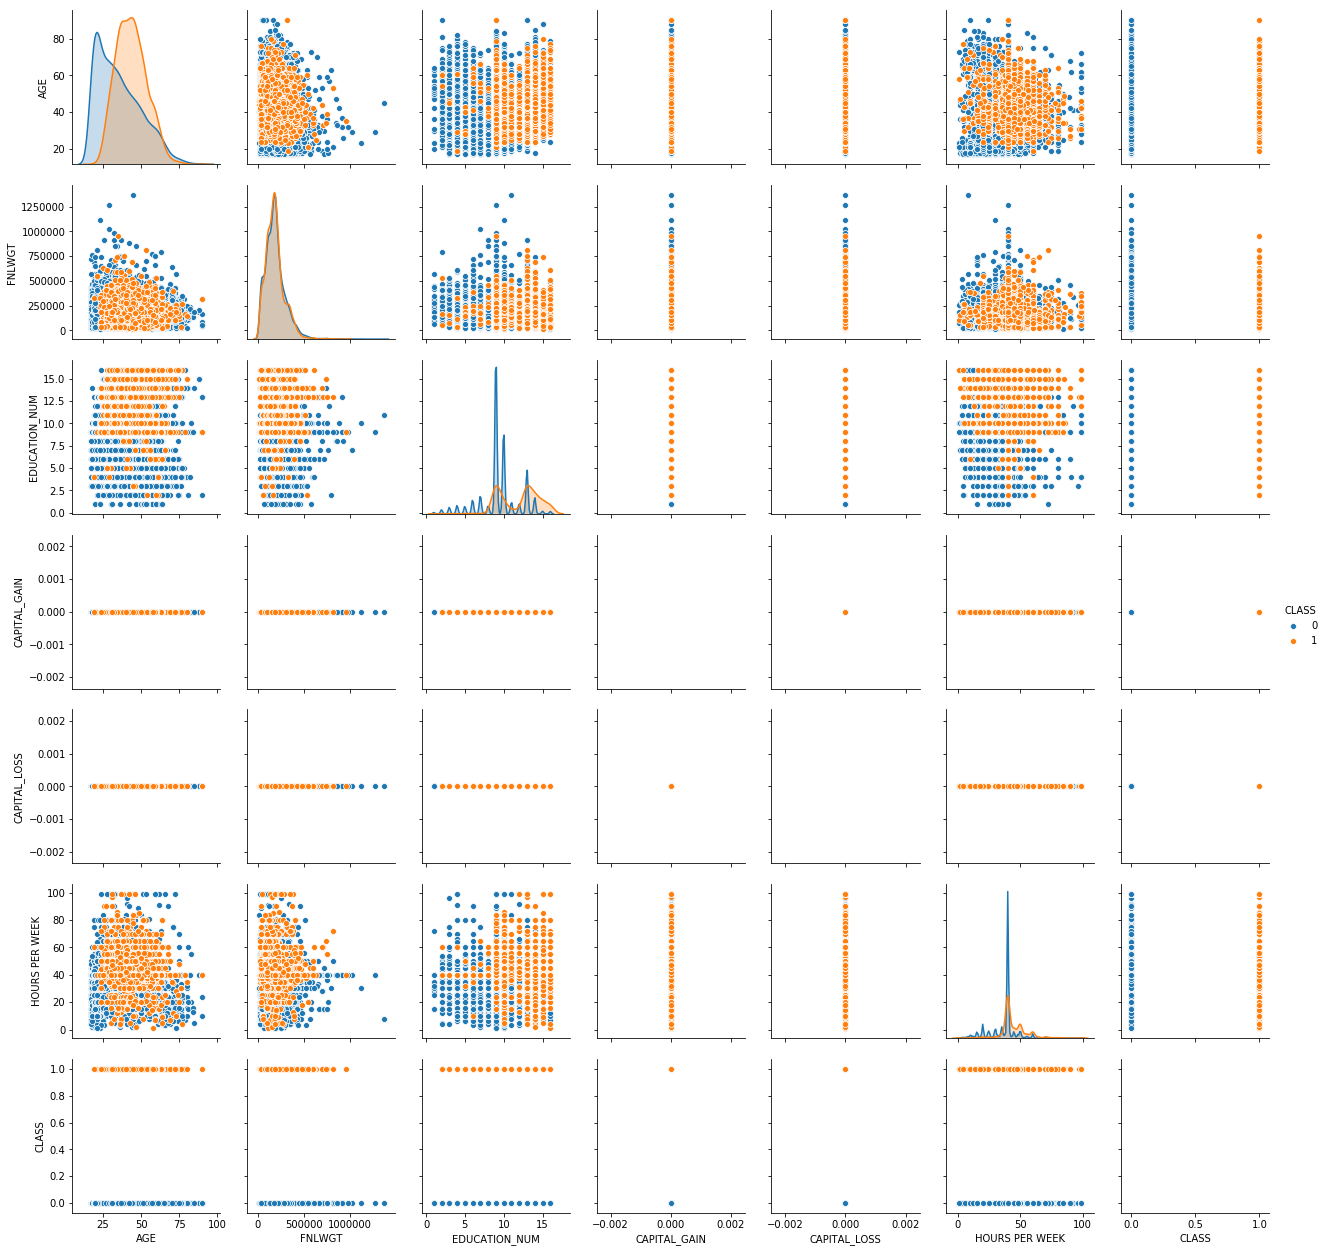

In [61]:
sns.pairplot(data, hue='CLASS', size=2.5);

### Correlation between the variables


In [62]:
#Plotting the relationships
dataset = data.copy()
#dataset.drop(columns=['EDUCATION_NUM', 'EDUCATION'])
cor = dataset.corr(method ='pearson')
cor

,AGE,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,HOURS PER WEEK,CLASS
AGE,1.000000,-0.068727,0.096662,NaN,NaN,0.165778,0.245288
FNLWGT,-0.068727,1.000000,-0.050428,NaN,NaN,0.001886,-0.018191
EDUCATION_NUM,0.096662,-0.050428,1.000000,NaN,NaN,0.214582,0.404598
CAPITAL_GAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAPITAL_LOSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HOURS PER WEEK,0.165778,0.001886,0.214582,NaN,NaN,1.000000,0.272594
CLASS,0.245288,-0.018191,0.404598,NaN,NaN,0.272594,1.000000


### Heat Map

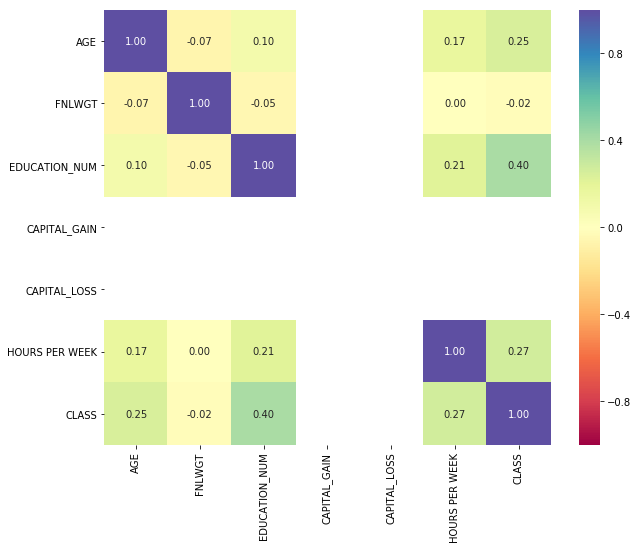

In [63]:
fig = plt.figure()
hm = fig.add_subplot(111)
sns.heatmap(cor,annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='Spectral')
#hm.set_xticklabels(dataset.columns)
#hm.set_yticklabels(dataset.columns)
plt.show()

## Checking for missing values

In [64]:
data.isnull().sum()

AGE               0
WORKCLASS         0
FNLWGT            0
EDUCATION         0
EDUCATION_NUM     0
MARTIAL_STATUS    0
OCCUPATION        0
RELATIONSHIP      0
GENDER            0
CAPITAL_GAIN      0
CAPITAL_LOSS      0
HOURS PER WEEK    0
COUNTRY           0
CLASS             0
dtype: int64

In [65]:
df_val.isnull().sum()

AGE                                   0
FNLWGT                                0
EDUCATION_NUM                         0
CAPITAL_GAIN                          0
CAPITAL_LOSS                          0
HOURS PER WEEK                        0
CLASS                                 0
WORKCLASS_?                           0
WORKCLASS_Federal-gov                 0
WORKCLASS_Local-gov                   0
WORKCLASS_Never-worked                0
WORKCLASS_Private                     0
WORKCLASS_Self-emp-inc                0
WORKCLASS_Self-emp-not-inc            0
WORKCLASS_State-gov                   0
WORKCLASS_Without-pay                 0
EDUCATION_10th                        0
EDUCATION_11th                        0
EDUCATION_12th                        0
EDUCATION_1st-4th                     0
EDUCATION_5th-6th                     0
EDUCATION_7th-8th                     0
EDUCATION_9th                         0
EDUCATION_Assoc-acdm                  0
EDUCATION_Assoc-voc                   0


## Preprocessing the data
### One hot encoding: Creating a column out of each value of a categorical column or variable.

In [66]:
# choose categorical and continuous features from data

categorical_columns = [c for c in data.columns 
                       if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns 
                     if data[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['WORKCLASS', 'EDUCATION', 'MARTIAL_STATUS', 'OCCUPATION', 'RELATIONSHIP', 'GENDER', 'COUNTRY']
numerical_columns: ['AGE', 'FNLWGT', 'EDUCATION_NUM', 'CAPITAL_GAIN', 'CAPITAL_LOSS', 'HOURS PER WEEK', 'CLASS']


#### One Hot encoding using get_dummies()

In [67]:
## this how get_dummies will return results
pd.get_dummies(data[categorical_columns]).head()

,WORKCLASS_?,WORKCLASS_Federal-gov,WORKCLASS_Local-gov,WORKCLASS_Never-worked,WORKCLASS_Private,WORKCLASS_Self-emp-inc,WORKCLASS_Self-emp-not-inc,WORKCLASS_State-gov,WORKCLASS_Without-pay,EDUCATION_10th,EDUCATION_11th,EDUCATION_12th,EDUCATION_1st-4th,EDUCATION_5th-6th,EDUCATION_7th-8th,EDUCATION_9th,EDUCATION_Assoc-acdm,EDUCATION_Assoc-voc,EDUCATION_Bachelors,EDUCATION_Doctorate,EDUCATION_HS-grad,EDUCATION_Masters,EDUCATION_Preschool,EDUCATION_Prof-school,EDUCATION_Some-college,MARTIAL_STATUS_Divorced,MARTIAL_STATUS_Married-AF-spouse,MARTIAL_STATUS_Married-civ-spouse,MARTIAL_STATUS_Married-spouse-absent,MARTIAL_STATUS_Never-married,MARTIAL_STATUS_Separated,MARTIAL_STATUS_Widowed,OCCUPATION_?,OCCUPATION_Adm-clerical,OCCUPATION_Armed-Forces,OCCUPATION_Craft-repair,OCCUPATION_Exec-managerial,OCCUPATION_Farming-fishing,OCCUPATION_Handlers-cleaners,OCCUPATION_Machine-op-inspct,...,COUNTRY_Cambodia,COUNTRY_Canada,COUNTRY_China,COUNTRY_Columbia,COUNTRY_Cuba,COUNTRY_Dominican-Republic,COUNTRY_Ecuador,COUNTRY_El-Salvador,COUNTRY_England,COUNTRY_France,COUNTRY_Germany,COUNTRY_Greece,COUNTRY_Guatemala,COUNTRY_Haiti,COUNTRY_Honduras,COUNTRY_Hong,COUNTRY_Hungary,COUNTRY_India,COUNTRY_Iran,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Jamaica,COUNTRY_Japan,COUNTRY_Laos,COUNTRY_Mexico,COUNTRY_Nicaragua,COUNTRY_Outlying-US(Guam-USVI-etc),COUNTRY_Peru,COUNTRY_Philippines,COUNTRY_Poland,COUNTRY_Portugal,COUNTRY_Puerto-Rico,COUNTRY_Scotland,COUNTRY_South,COUNTRY_Taiwan,COUNTRY_Thailand,COUNTRY_Trinadad&Tobago,COUNTRY_United-States,COUNTRY_Vietnam,COUNTRY_Yugoslavia
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
# we will use pd.get_dummies to create one hot encoding for the categorical variables and join them with the numerical columns to form the dataset
df = pd.concat([data[numerical_columns],pd.get_dummies(data[categorical_columns])], axis=1)

## Splitting Data into Train and Validation set

<b>We split Train and Validation in 70-30% split


In [69]:
df_train, df_val = train_test_split(df, test_size=0.30, random_state = 42)

print("Rows and columns for Train:",df_train.shape)
print("Rows and columns for Test",df_val.shape)

Rows and columns for Train: (7053, 103)
Rows and columns for Test (3024, 103)


# Random Forest

In [70]:
features = df.drop(['CLASS'], axis=1).columns

features

Index(['AGE', 'FNLWGT', 'EDUCATION_NUM', 'CAPITAL_GAIN', 'CAPITAL_LOSS',
       'HOURS PER WEEK', 'WORKCLASS_?', 'WORKCLASS_Federal-gov',
       'WORKCLASS_Local-gov', 'WORKCLASS_Never-worked',
       ...
       'COUNTRY_Portugal', 'COUNTRY_Puerto-Rico', 'COUNTRY_Scotland',
       'COUNTRY_South', 'COUNTRY_Taiwan', 'COUNTRY_Thailand',
       'COUNTRY_Trinadad&Tobago', 'COUNTRY_United-States', 'COUNTRY_Vietnam',
       'COUNTRY_Yugoslavia'],
      dtype='object', length=102)

In [0]:
clf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,random_state =50, max_features = None)
                          
clf.fit(df_train[features], df_train["CLASS"])

# Make predictions
predictions = clf.predict(df_val[features])
probs = clf.predict_proba(df_val[features])

In [72]:
score = clf.score(df_val[features], df_val["CLASS"])
print("Accuracy: ", score)
print(confusion_matrix(df_val["CLASS"],predictions))
print(classification_report(df_val["CLASS"],predictions))

Accuracy:  0.8468915343915344
[[2064  196]
 [ 267  497]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2260
           1       0.72      0.65      0.68       764

    accuracy                           0.85      3024
   macro avg       0.80      0.78      0.79      3024
weighted avg       0.84      0.85      0.84      3024

